## **Web Scrapping**

In [22]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [23]:
# URL base
url_base = 'https://extremetechcr.com/tienda/30-teclados#/page-'

# Listas para almacenar los datos
name_articulo = []
precio = []

# Iterar sobre las páginas
for i in range(1, 31):
    url = url_base + str(i)
    html_text = requests.get(url).text
    soup = BeautifulSoup(html_text, 'lxml')
    product_list = soup.find_all('div', class_='product-container product-block')

    # Iterar sobre los productos
    for product in product_list:
        product_name = product.find('a', class_='product-name').text.strip()
        product_price = product.find('span', class_='price product-price').text.replace(' ', '').strip()

        # Agregar a las listas
        name_articulo.append(product_name)
        precio.append(product_price)

# Crear DataFrame con pandas
df = pd.DataFrame({
    'Nombre': name_articulo,
    'Precio': precio
})

print(df)

                                        Nombre   Precio
0                       XTech XTK092E - Ingles   ₡3,000
1      Redragon P037 Meteor L gaming wrist pad   ₡3,000
2     Teclado Argom USB - Ingles - ARG-KB-7424   ₡3,500
3                     Argom - Teclado numérico   ₡3,500
4                              Argom - Teclado   ₡3,900
..                                         ...      ...
715        Xtech Edición Iron Man - XTK-M401IM  ₡15,000
716    Redragon Dragonborn K630 Blanco RGB-Red  ₡15,000
717   Redragon Dragonborn K630 Negro RGB Brown  ₡15,000
718  Redragon Dragonborn K630 Blanco RGB-Brown  ₡15,000
719    Redragon Dragonborn K630 Negro RGB -RED  ₡15,000

[720 rows x 2 columns]


In [24]:
#########################
print(df.isnull().sum())
########################
print(df.shape)

Nombre    0
Precio    0
dtype: int64
(720, 2)


In [25]:
df['Precio'] = df['Precio'].str.replace("₡", "", case=False, regex=False)
df['Precio'] = df['Precio'].str.replace(',','').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  720 non-null    object
 1   Precio  720 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 8.6+ KB


In [26]:
df.head()

,Nombre,Precio
0,XTech XTK092E - Ingles,3000
1,Redragon P037 Meteor L gaming wrist pad,3000
2,Teclado Argom USB - Ingles - ARG-KB-7424,3500
3,Argom - Teclado numérico,3500
4,Argom - Teclado,3900


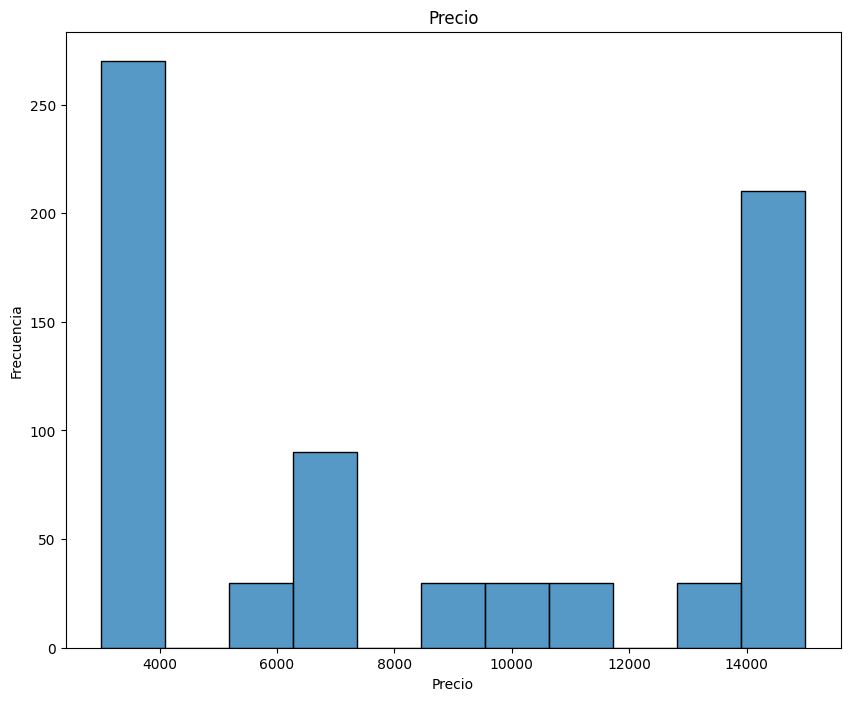

In [27]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='Precio')
plt.title('Precio')
plt.ylabel('Frecuencia')
plt.show()

In [28]:
max_precio=df.loc[df['Precio'].idxmax()]
max_precio

Nombre    Xtech Edición Iron Man - XTK-M401IM
Precio                                  15000
Name: 19, dtype: object

In [29]:
min_precio=df.loc[df['Precio'].idxmin()]
min_precio

Nombre    XTech XTK092E - Ingles
Precio                      3000
Name: 0, dtype: object